In [95]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [96]:
mean = np.array([3,5])
cov = np.array([[2,1],[1,2]])
N = 2000

In [97]:
sample = np.random.multivariate_normal(mean,cov,size=N)

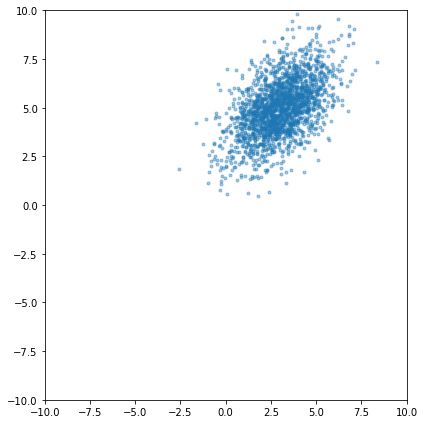

In [98]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(sample[:,0],sample[:,1],'.',alpha=0.4)
#sns.kdeplot(sample[:,0],sample[:,1], ax=ax, color='k')
ax.set(xlim=[-10,10],ylim=[-10,10])
plt.tight_layout()

In [99]:
x = sample - sample.mean(axis=0)

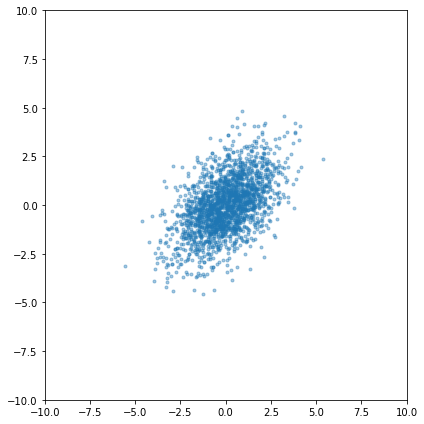

In [100]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x[:,0],x[:,1],'.',alpha=0.4)
#sns.kdeplot(x[:,0],x[:,1], ax=ax, color='k')
ax.set(xlim=[-10,10],ylim=[-10,10])
plt.tight_layout()

In [101]:
covariance_matrix = x.T.dot(x)/N

In [102]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [103]:
eigenvalues

array([ 3.05547213,  0.99106803])

In [104]:
eigenvectors

array([[ 0.70805497, -0.70615732],
       [ 0.70615732,  0.70805497]])

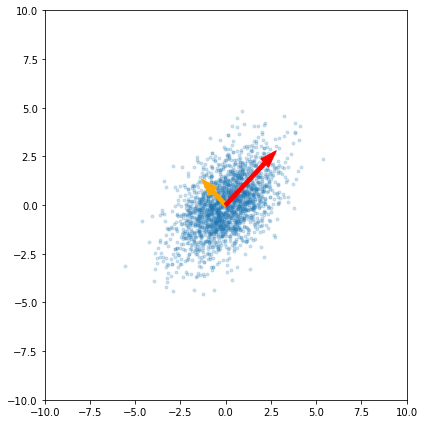

In [111]:
fig, ax = plt.subplots(figsize=(6,6))
ax.arrow(0,0, eigenvalues[0]*eigenvectors[0,0], eigenvalues[0]*eigenvectors[1,0], width=0.2, color='red',zorder=2)
ax.arrow(0,0, eigenvalues[1]*eigenvectors[0,1], eigenvalues[1]*eigenvectors[1,1], width=0.2, color='orange',zorder=1)
ax.plot(x[:,0],x[:,1],'.',alpha=0.2,zorder=0)
ax.set(xlim=[-10,10],ylim=[-10,10])
plt.tight_layout()

# Example mixture of multivariate gaussians

In [112]:
mean1 = np.array([3,5,5])
mean2 = np.array([1,2,3])
cov1 = np.array([[2,1,1],[1,2,1],[1,1,2]])
cov2 = np.array([[1,-0.5,0.5],[-0.5,1,-0.5],[0.5,-0.5,1]])
N1 = N2 = 1000

In [113]:
sample1 = np.random.multivariate_normal(mean1,cov1,size=N1)
sample2 = np.random.multivariate_normal(mean2,cov2,size=N2)

In [114]:
sample = np.vstack([sample1,sample2])

In [115]:
x = sample - sample.mean(axis=0)

In [116]:
covariance_matrix = x.T.dot(x)/(N1+N2)

In [117]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [118]:
eigenvalues

array([ 6.54520404,  0.7441255 ,  1.55135423])

In [119]:
x.dot(eigenvectors)

array([[ 0.77441841, -1.46749601,  0.43990532],
       [-2.06017207,  0.01358164,  0.76968054],
       [-0.87557423, -1.05838196,  0.0491893 ],
       ..., 
       [ 0.97675864,  0.68533274,  1.02834069],
       [ 2.88951152,  1.06836642,  2.52297507],
       [ 1.55716645, -0.60637504,  0.13825722]])

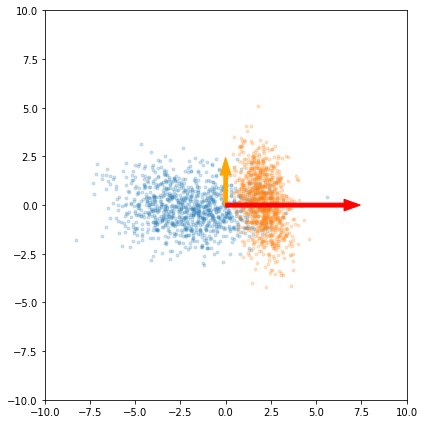

In [120]:
fig, ax = plt.subplots(figsize=(6,6))
ax.arrow(0,0, eigenvalues[0], 0, width=0.2, color='red',zorder=2)
ax.arrow(0,0, 0, eigenvalues[2], width=0.2, color='orange',zorder=1)
ax.plot(x.dot(eigenvectors)[:N1,0],x.dot(eigenvectors)[:N1,2],'.',alpha=0.2,zorder=0)
ax.plot(x.dot(eigenvectors)[N1:,0],x.dot(eigenvectors)[N1:,2],'.',alpha=0.2,zorder=0)
ax.set(xlim=[-10,10],ylim=[-10,10])
plt.tight_layout()